# Assignment2

## Notebook made by  

|Rogier van Witzenburg | 10606947 | rogiervanwitzenburg@gmail.com |
|:- |:-|:-|
|.Andreas Vos |10779752 | acefoxy@gmail.com|
|  | |. |

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='http://www.andreasvos.nl/own.png'/>
<img src='http://2ndgoods.nl/wp-content/uploads/2016/08/148106003133056-2-300x300.jpg'/>n
### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**


# Part 1: obtaining information from the web

### RSS parsing

Make a notebook that performs the following steps.

1. Create a script that retrieves all urls of rss feeds from <http://www.volkskrant.nl/rss/feeds/>. Use urllib2 and beautifulsoup for this. Store the urls in a list.
    * **update 2016**
    * As all Dutch sites, Volkskrant asks whether you accept cookies. This makes simple collecting webpages a lot harder. 
    * The code in the code cell below does the trick. 
    * After running this, I could collect further files from Volkskrant without additional cookie hassle.
2. Download all rss feeds and store them on disk.
3. Parse all RSS feeds using `lxml`. Create a list of  dicts with fields "channel", "url", "title", "date" in which you store this information for each item.
4. Compute some statistics about this dict: how many items, how many per channel, are there doubles (items occuring in several channels), etc.
5. Write this list as a csv file, store on disk, and upload to Google fusion tables.
6. Download all articles (once), parse out the text and store as pairs (date,text) in a list.
7. Count per day the number of words, and the number of unique words. Show this in a plot.

In [46]:
import cookielib # Thanks to http://stackoverflow.com/questions/29395407/enabling-cookies-with-urllib
import urllib2
import urllib
import requests
import os
from bs4 import BeautifulSoup
import re 
from collections import Counter

import pandas as pd
import csv
import json
import matplotlib.pyplot as plt

In [2]:



url =   'http://www.volkskrant.nl/rss/feeds/'

# with urllib2 and handling cookies
cookiejar= cookielib.LWPCookieJar()
opener= urllib2.build_opener( urllib2.HTTPCookieProcessor(cookiejar) )
response=opener.open(url)
html_doc= ' '.join(response.readlines())
 
rsssoup = BeautifulSoup(html_doc, "lxml")


# test 
list_items=[ref['href'] for ref in  rsssoup.findAll('a')  if ref.get('href')]
len(list_items), list_items[91:124]
list_items = list_items[91:124]


print list_items

['http://www.volkskrant.nl/nieuws/rss.xml', 'http://www.volkskrant.nl/nieuws-voorpagina/rss.xml', 'http://www.volkskrant.nl/buitenland/rss.xml', 'http://www.volkskrant.nl/binnenland/rss.xml', 'http://www.volkskrant.nl/opinie/rss.xml', 'http://www.volkskrant.nl/economie/rss.xml', 'http://www.volkskrant.nl/sport/rss.xml', 'http://www.volkskrant.nl/tech/rss.xml', 'http://www.volkskrant.nl/media/rss.xml', 'http://www.volkskrant.nl/wetenschap/rss.xml', 'http://www.volkskrant.nl/politiek/rss.xml', 'http://www.volkskrant.nl/kijkverder/rss.xml', 'http://www.volkskrant.nl/cartoons/rss.xml', 'http://www.volkskrant.nl/foto/rss.xml', 'http://www.volkskrant.nl/vonk/rss.xml', 'http://www.volkskrant.nl/authors/rss.xml', 'http://www.volkskrant.nl/toplists/rss.xml', 'http://www.volkskrant.nl/archief/rss.xml', 'http://www.volkskrant.nl/cultuur-en-leven/rss.xml', 'http://www.volkskrant.nl/cultuur-en-leven-voorpagina/rss.xml', 'http://www.volkskrant.nl/recensies/rss.xml', 'http://www.volkskrant.nl/film/rs

In [ ]:
#download all files and store them on disk
for i in range(len(list_items)):
    url = list_items[i]
    filename = url[25:29]+'.xml'
    
    r = requests.get(url)
    with open(filename, "wb") as code:
        code.write(r.content)  


In [48]:
# Parse all RSS feeds using lxml. Create a list of dicts with fields "channel", "url", "title", "date" in which you store this information for each item.
from lxml import etree
from lxml import objectify

#need channels
#parse with single files in lists  
path = '/Users/macbook/Desktop/DS/week1/hi/'
files = !ls '/Users/macbook/Desktop/DS/week1/hi/'
for filee in files:
    with open(path+filee, 'r') as f:
        parsed = etree.parse(f)
        titles=parsed.xpath('//channel//title')
        titlestrings= [ t.text for t in titles]
        links=parsed.xpath('//channel//link')
        linkstrings= [ t.text for t in links]
        dates=parsed.xpath('//channel//pubDate')
        datestrings = [ t.text for t in dates]
        channel=parsed.xpath('//channel//title')
        channelstrings = [ t.text for t in channel]
        channels = [i for i in channelstrings if i.startswith('VK:')]
        title_dict = [{'channel':x, 'title':y, 'link':z, 'date':a} for x in channels for y in titlestrings for z in linkstrings for a in datestrings]
        how_many_channel = len(title_dict)
        
        
        data = pd.DataFrame.from_dict(title_dict)

        
        data.to_csv('dates3.csv',encoding='utf-8',mode='a',sep='\t')
        
titles_dict = [{'channel':x, 'title':y, 'link':z, 'date':a} for x in channels for y in titlestrings for z in linkstrings for a in datestrings]













In [26]:
#getting all volkskrant articles
from lxml import etree
from lxml import objectify
import requests


path = '/Users/macbook/Desktop/DS/week1/hi/'
files = !ls '/Users/macbook/Desktop/DS/week1/hi/'
for filee in files:
    with open(path+filee, 'r') as f:
        parsed = etree.parse(f)
        links=parsed.xpath('//channel//link')
        linkstrings= list(set([ t.text for t in links]))
        linkstringss= [i for i in linkstrings if not i.endswith('krant.nl')]
        

        for i in range(len(linkstringss)):
            url = linkstrings[i]
            filename = url[-9:-1]+".html"
            r = requests.get(url)
            with open(filename, "wb") as code:
                  code.write(r.content) 
            
        

In [1]:
#6 make tuples
path = '/Users/macbook/Desktop/DataScience/week1/volkskrantartikelen/'
files = !ls '/Users/macbook/Desktop/DataScience/week1/volkskrantartikelen/'

for filee in files:
    with open(path+filee, 'r') as f:
        volkskrant = BeautifulSoup(f, "lxml")
        list_items=[(time.text, ref.text) for ref in  volkskrant.findAll('p',attrs={'class' : 'article__body__paragraph'}) for time in  volkskrant.findAll('time',attrs={'class' : 'article__publication-date'})]
        
          #Count per day the number of words,  
        seven = [(str(time.text), Counter(ref.text.split())) for ref in  volkskrant.findAll('p',attrs={'class' : 'article__body__paragraph'}) for time in  volkskrant.findAll('time',attrs={'class' : 'article__publication-date'})]
        #the number of unique words.
        unique = {a:len([(i,j) for a,b in seven for i,j in b.iteritems() if j == 1])for a,b in seven}
        
    
    

NameError: name 'BeautifulSoup' is not defined

In [9]:
#Plots
for a,b in seven:
    plt.plot(b.values())
    plt.ylabel('how many words')
    plt.show()
    
#unique number of words
for a,b in unique.iteritems():
    
    
    plt.plot(b)
    plt.ylabel('how many words')
    plt.show()

{'6 februari 2017, 12:19': 161}


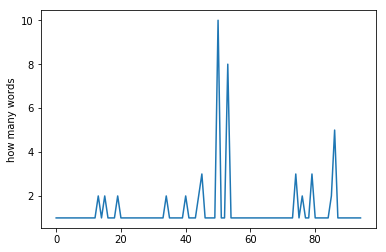

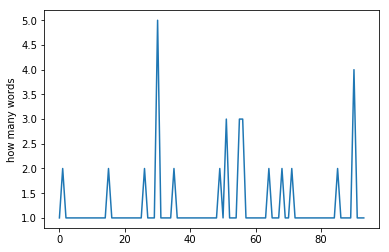

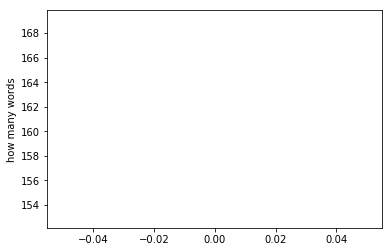

### JSON parsing

1. Download <http://maartenmarx.nl/teaching/DataScience/NoteBooks/consuming-json-data-from-a-web-service.ipynb>, remove all code blocks, and turn it into a notebook again. 
2. Check that what you did is correct and you did not remove too much using a notebook viewer.
3. Now extract all code from the downloaded notebook, save it to a file, and execute it as a Python script. Does it give errors? Is it syntactically correct?

In [43]:
#See https://docs.python.org/2/howto/urllib2.html
import json
import urllib2
url = "http://maartenmarx.nl/teaching/DataScience/NoteBooks/consuming-json-data-from-a-web-service.ipynb"
jsonfile= urllib2.urlopen(url)
#getting files
json_as_python_object = json.load(jsonfile) # The josnfile transformed into a Python dict
json_as_python_object
not_code = [i for i in json_as_python_object['cells'] if not i['cell_type'] == 'code']
code = [i for i in json_as_python_object['cells'] if i['cell_type'] == 'code']

        


In [45]:
#1#wrote without code
with open('data.ipynb', 'w') as outfile:
    json.dump(not_code, outfile)

In [44]:
#3 json_as_python_object

with open('data.py', 'w') as outfile:
    json.dump(code, outfile)

# it does give errors. It is horrible.


### PDF parsing

1. Save a wordfile as PDF, open it in Python, extract all text. Describe the differences, if any. Try the same with a two column PDF file from the web. This exercise gets more interesting if you use _difficult_ PDF. Why not try <http://wch.github.io/latexsheet/latexsheet.pdf>?

* Is the word order still as it should be?
* What about the strange characters?

In [12]:
paper = !pdf2txt.py /Users/macbook/Desktop/pdfminer/Paperanalyselab.pdf

book = !pdf2txt.py /Users/macbook/Desktop/pdfminer/networksbook.pdf

latex = !pdf2txt.py /Users/macbook/Desktop/pdfminer/latexsheet.pdf

#All worked pretty well. The book crashed the notebook but the word order does it well. Strange caracters are well defined in the latexsheet so no problem either

# Part 2  Monty Hall

# Q1 (Monty Hall problem)

This is the part you hand in from the [warm up notebook](MontyHall.ipynb).

##  This counts for your mark

Generalize your simulation code to handle the case of `n` doors.


This sentence can be read in two ways, giving very different outcomes! You must program both, and understand that it all makes sense.


### Your work
For both interpretations, give a plot with the number of doors on the x-axis and the win_percentage on the y-axis, and plot that value for the two strategies for numbers of doors between 3 and 20. 

Describe briefly what is going on here, and why the plots makes sense.


### Interpretation  1
* There are _n_ doors.
* You have chosen one door.
* The host opens one door as before (it is not the door you have chosen and not a door with the prize)
* Now you switch or not.

### Interpretation 2
* There are _n_ doors.
* You have chosen one door.
* The host opens _all except two doors_, namely your door, and a random other door.  Behind none of the opened doors lies the prize.

In [ ]:
# your code here

# Uitleg 

* hier komt jullie uitleg